<a href="https://colab.research.google.com/github/aguilargallardo/DS-Unit-2-Applied-Modeling/blob/master/DS-Unit-2-Applied-Modeling/module1/Unit_2_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving SpotifyFeatures.csv to SpotifyFeatures.csv


In [0]:
import pandas as pd
df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.genre.value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [0]:
Rap = df[df.genre == 'Rap']

In [6]:
Rap.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
86952,Rap,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.14900,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.55600,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913
86954,Rap,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446
86955,Rap,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.25900,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544


In [0]:
Popular = Rap.sort_values(by='popularity', ascending=False)

In [8]:
Popular.head(20), Popular.shape

(      genre             artist_name  ... time_signature valence
 86951   Rap             Post Malone  ...            4/4   0.385
 86953   Rap             Post Malone  ...            4/4   0.913
 86952   Rap                 J. Cole  ...            4/4   0.463
 86955   Rap               Meek Mill  ...            4/4   0.544
 86954   Rap            Travis Scott  ...            4/4   0.446
 86965   Rap             Post Malone  ...            4/4   0.374
 86961   Rap             Kodak Black  ...            4/4   0.504
 86957   Rap               21 Savage  ...            4/4   0.274
 86956   Rap                Blueface  ...            4/4   0.391
 86958   Rap                Lil Baby  ...            4/4   0.358
 86963   Rap              Juice WRLD  ...            4/4   0.218
 86967   Rap               Sheck Wes  ...            4/4   0.261
 86970   Rap            XXXTENTACION  ...            4/4   0.473
 86960   Rap              Juice WRLD  ...            4/4   0.535
 86962   Rap  A Boogie Wi

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(Popular, train_size=.8)

In [0]:
target = 'popularity'
feature = ['acousticness','danceability','duration_ms',
           'energy','instrumentalness','liveness','loudness',
           'speechiness','tempo','valence']

In [0]:
X_train = train[feature]
X_test = test[feature]

y_test = test[target]
y_train = train[target]

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(),
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.9s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


In [14]:
print('Best hyperparameters', search.best_params_)
print('MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.3529810119360062, 'randomforestregressor__n_estimators': 374, 'simpleimputer__strategy': 'median'}
MAE 6.375250261146682


In [15]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

,5,3,7,6,1,9,8,2,0,4
mean_fit_time,3.10335,2.5889,1.07903,9.3366,12.3327,12.0979,16.8027,16.8837,2.01606,2.96379
std_fit_time,0.0220421,0.014319,0.00338443,0.0427673,0.084965,0.0483104,0.160176,0.0807447,0.0484217,0.0206693
mean_score_time,0.0851217,0.155363,0.029684,0.108793,0.315607,0.24628,0.260422,0.305628,0.0539316,0.0645146
std_score_time,0.00193853,0.00222843,0.000415376,0.000728341,0.00963168,0.0273098,0.00177412,0.0068105,0.00194117,0.000679539
param_randomforestregressor__max_depth,5,15,10,10,20,None,20,20,20,20
param_randomforestregressor__max_features,0.352981,0.183795,0.316297,0.885127,0.411224,0.52885,0.787839,0.679554,0.465321,0.585367
param_randomforestregressor__n_estimators,374,289,75,287,442,345,379,433,71,89
param_simpleimputer__strategy,median,median,median,median,median,mean,mean,mean,median,mean
params,"{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': 15, 'rand...","{'randomforestregressor__max_depth': 10, 'rand...","{'randomforestregressor__max_depth': 10, 'rand...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 20, 'rand..."
split0_test_score,-6.47513,-6.48139,-6.47488,-6.4849,-6.52327,-6.51926,-6.52953,-6.53664,-6.53909,-6.55534


In [16]:
from sklearn.metrics import mean_absolute_error
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae:,.0f}')

Test MAE: 7


In [0]:
Popular['id'] = Popular.groupby(['artist_name']).ngroup()

In [0]:
train, test = train_test_split(Popular, train_size=.8)

In [19]:
Popular.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,id
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,658
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.55600,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913,658
86952,Rap,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.14900,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463,351
86955,Rap,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.25900,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544,544
86954,Rap,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446,864


In [0]:
target = 'popularity'
feature = ['id','acousticness','danceability','duration_ms',
           'energy','instrumentalness','liveness','loudness',
           'speechiness','tempo','valence']

In [0]:
X_train = train[feature]
X_test = test[feature]

y_test = test[target]
y_train = train[target]

In [22]:
Popular.artist_name.value_counts()

Drake             159
Eminem            125
Kanye West        116
Future            115
Mac Miller        104
                 ... 
outsideOUTSIDE      1
House Of Pain       1
Rexx Life Raj       1
J. Dash             1
Cris Cab            1
Name: artist_name, Length: 979, dtype: int64

In [23]:
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(),
)

pipeline.fit(X_train, y_train)

print('Train Accuracy', pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy 0.8211107271397886


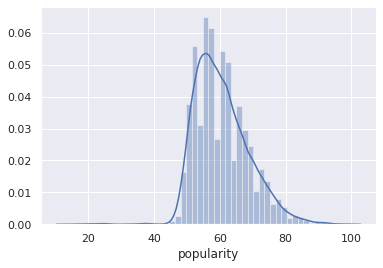

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)
sns.distplot(Popular.popularity);

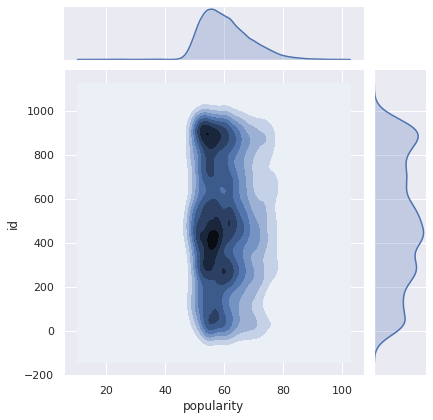

In [25]:
sns.jointplot(x=target, y='id', data=Popular, kind="kde");

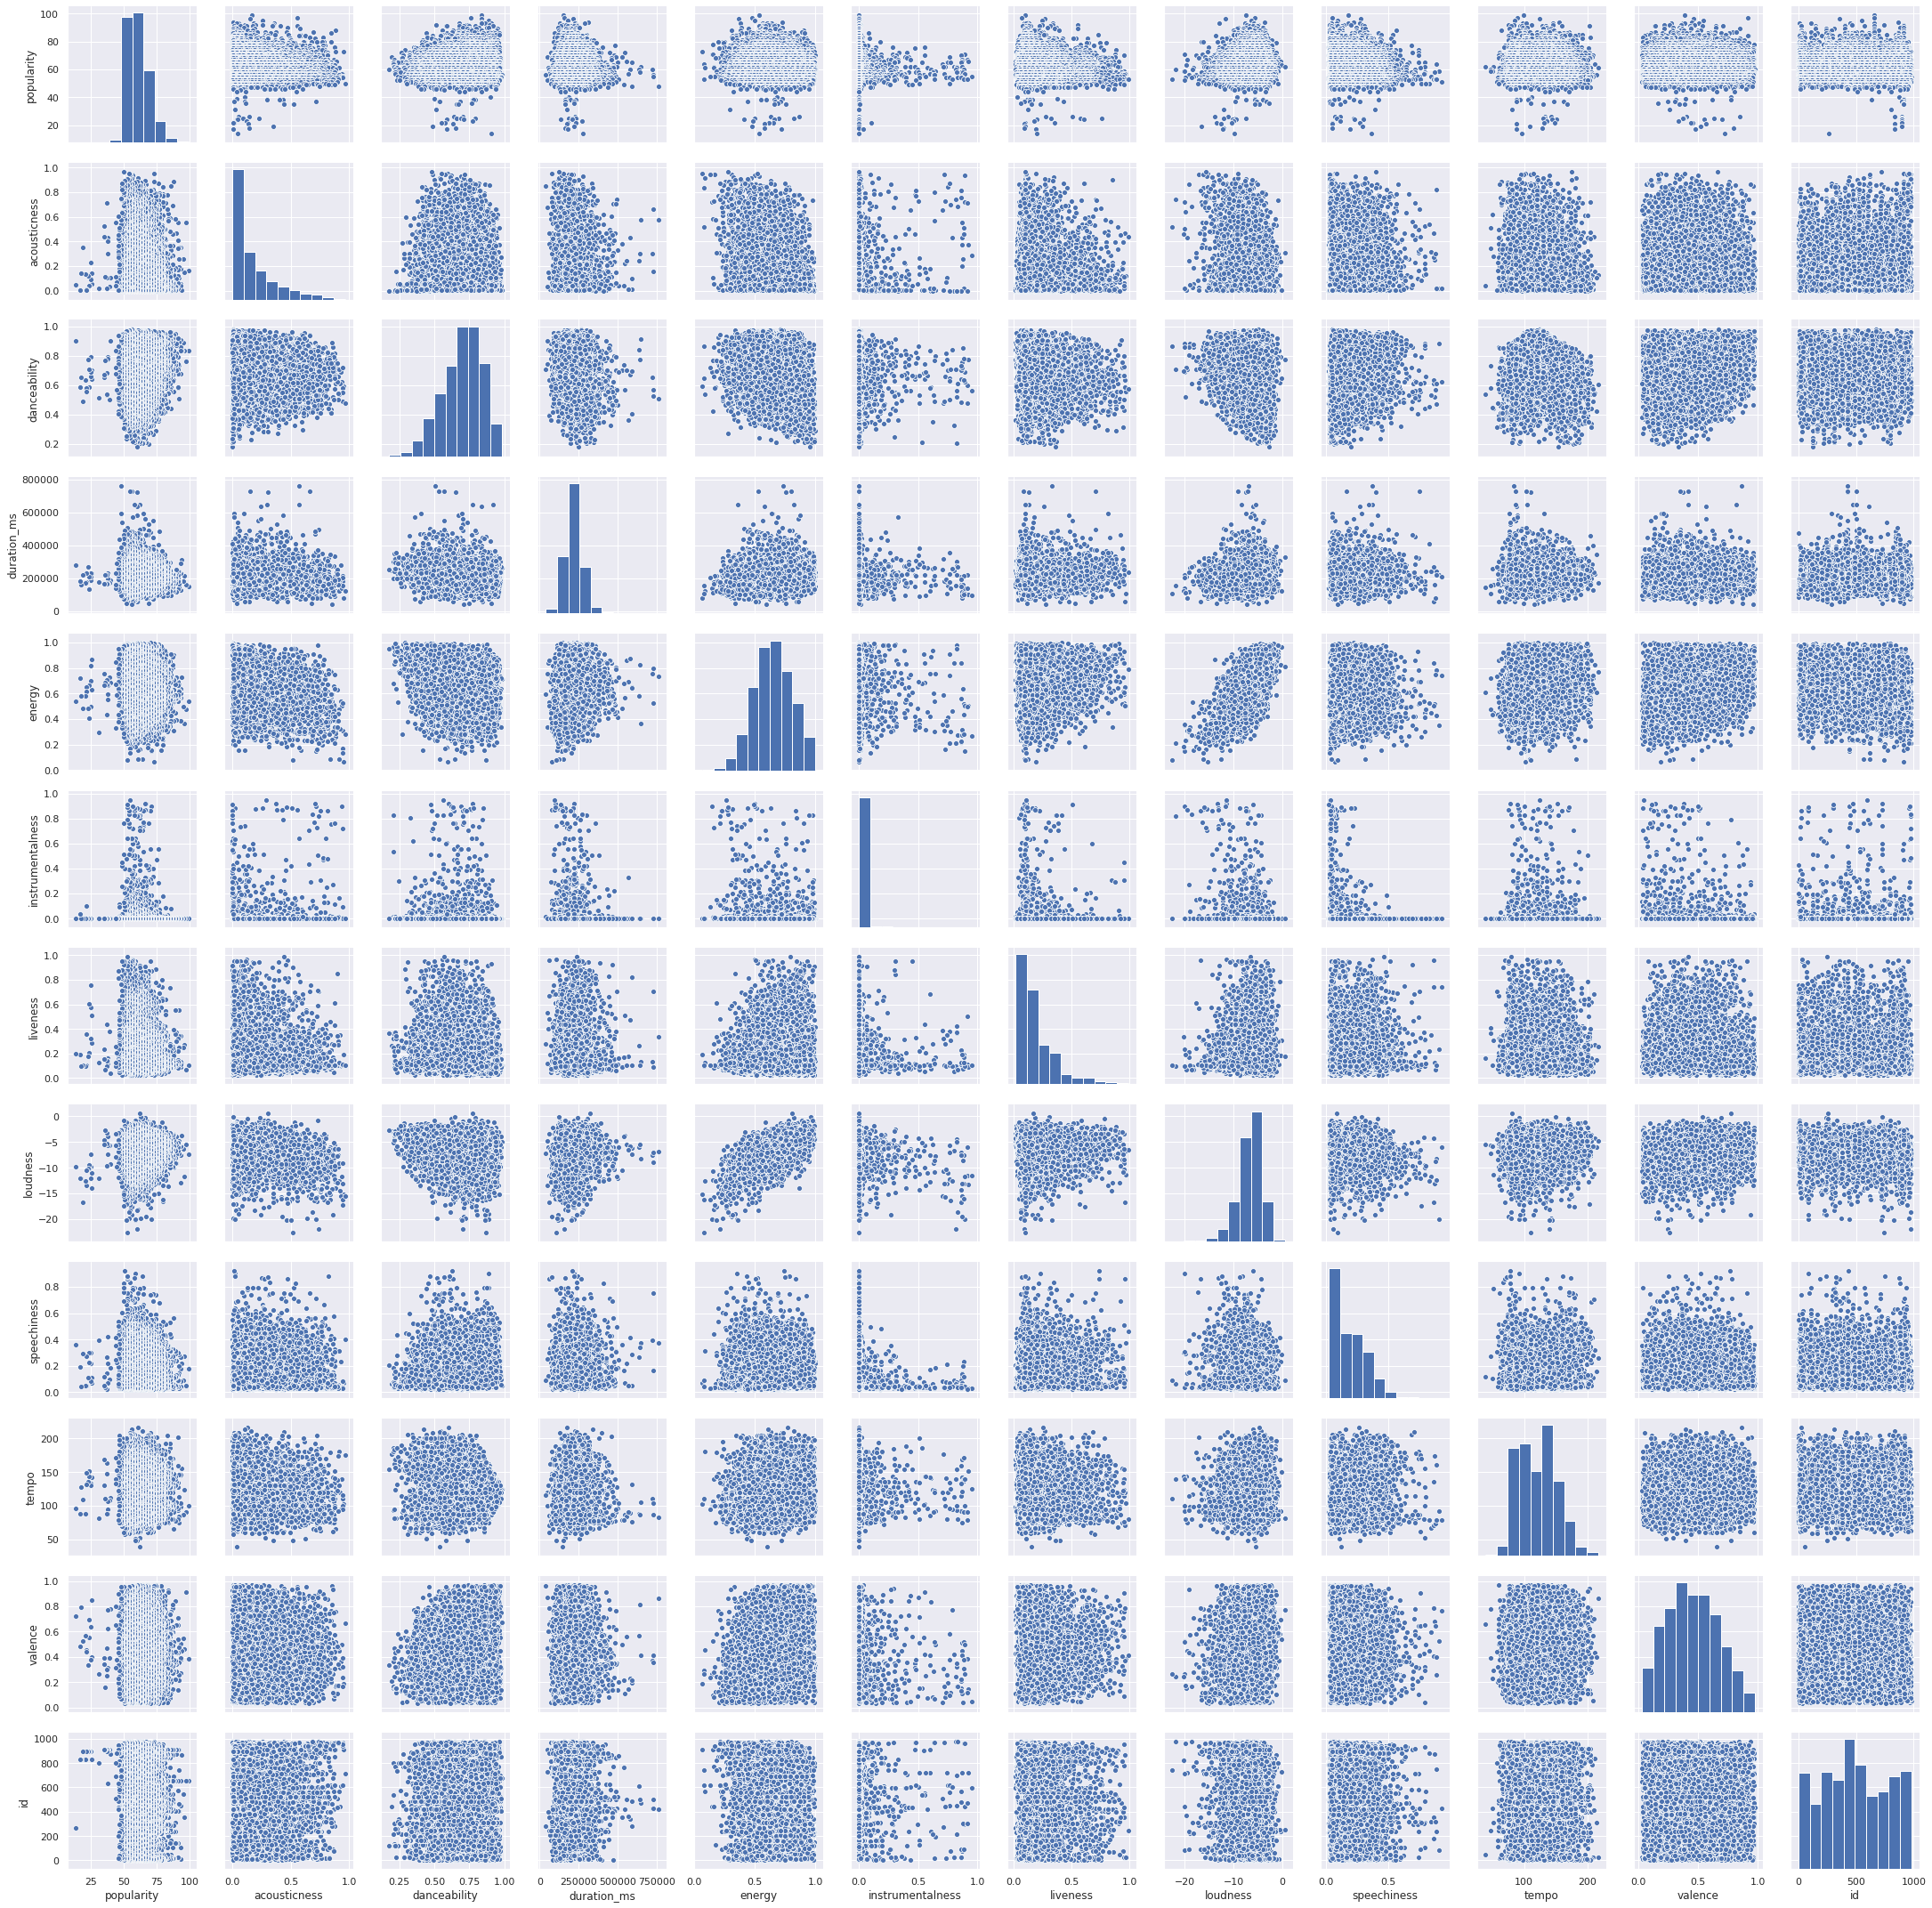

In [26]:
sns.pairplot(Popular);